In [ ]:
import os
import pickle
import pandas as pd
import numpy as np


folder_path = "Path to your dataset folder"


all_dataframes = []

for file in os.listdir(folder_path):
    if file.endswith('.pkl'):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
            all_dataframes.append(data)


df = pd.concat(all_dataframes, ignore_index=True)


In [114]:
df.shape

(1754155, 9)

In [115]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0


In [116]:
df.drop(columns=['TX_TIME_DAYS', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD_SCENARIO' ], inplace=True)

In [117]:
df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD
0,0,2018-04-01 00:00:31,596,3156,57.16,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,0
2,2,2018-04-01 00:07:56,2,1365,146.00,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,0
4,4,2018-04-01 00:10:34,927,9906,50.99,0


In [118]:
df['TX_FRAUD'].value_counts()

0    1739474
1      14681
Name: TX_FRAUD, dtype: int64

In [119]:
fraud_df = df[(df['TX_FRAUD'] == 1) & (df['TX_AMOUNT'] > 230)].head(680).copy()
fraud_df['TX_AMOUNT'] = np.random.randint(188, 251, size=len(fraud_df))
non_fraud_df = df[df['TX_FRAUD'] == 0].head(66320)

df = pd.concat([fraud_df, non_fraud_df], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [120]:
print(df.shape)

(67000, 6)


In [121]:
df['TX_FRAUD'].value_counts()

0    66320
1      680
Name: TX_FRAUD, dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67000 entries, 0 to 66999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TRANSACTION_ID  67000 non-null  int64         
 1   TX_DATETIME     67000 non-null  datetime64[ns]
 2   CUSTOMER_ID     67000 non-null  object        
 3   TERMINAL_ID     67000 non-null  object        
 4   TX_AMOUNT       67000 non-null  float64       
 5   TX_FRAUD        67000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.1+ MB


In [123]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'], format='%Y-%m-%d %H:%M')


df['DAY'] = df['TX_DATETIME'].dt.day
df['MONTH'] = df['TX_DATETIME'].dt.month
df['YEAR'] = df['TX_DATETIME'].dt.year
df['HOUR'] = df['TX_DATETIME'].dt.hour
df['MINUTE'] = df['TX_DATETIME'].dt.minute
df.drop(columns=['TX_DATETIME','TRANSACTION_ID' ], axis=1, inplace=True)
df.head()


,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,DAY,MONTH,YEAR,HOUR,MINUTE
0,566,5056,20.71,0,4,4,2018,14,34
1,524,1445,13.04,0,2,4,2018,10,46
2,2457,4068,157.29,0,2,4,2018,6,17
3,1636,3895,94.08,0,3,4,2018,0,2
4,4466,6925,24.55,0,4,4,2018,12,59


In [124]:
fraud = df[df['TX_AMOUNT'] >= 220]
print(fraud.head())  # Show first few rows
print(f"Total high-value transactions: {len(fraud)}")

     CUSTOMER_ID TERMINAL_ID  TX_AMOUNT  TX_FRAUD  DAY  MONTH  YEAR  HOUR  \
19            71        1385      222.0         1    2      5  2018    11   
20           245        1053      227.0         1   16      4  2018     6   
104         2891        4209      225.0         1    5      5  2018     6   
314         2965          75      236.0         1   19      4  2018    12   
1386        1482        8820      230.0         1   12      4  2018    13   

      MINUTE  
19        17  
20        59  
104       29  
314       10  
1386      50  
Total high-value transactions: 326


In [125]:
df.describe()

,TX_AMOUNT,TX_FRAUD,DAY,MONTH,YEAR,HOUR,MINUTE
count,67000.000000,67000.000000,67000.000000,67000.000000,67000.0,67000.000000,67000.000000
mean,54.640929,0.010149,4.071672,4.004194,2018.0,11.368373,29.456000
std,42.501556,0.100232,2.365528,0.064626,0.0,4.987974,17.258067
min,0.010000,0.000000,1.000000,4.000000,2018.0,0.000000,0.000000
25%,21.220000,0.000000,2.000000,4.000000,2018.0,8.000000,15.000000
50%,45.220000,0.000000,4.000000,4.000000,2018.0,11.000000,29.000000
75%,77.840000,0.000000,6.000000,4.000000,2018.0,15.000000,44.000000
max,250.000000,1.000000,30.000000,5.000000,2018.0,23.000000,59.000000


C:\Users\Hareesh\AppData\Local\Temp\ipykernel_9384\2898719133.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


<Axes: >

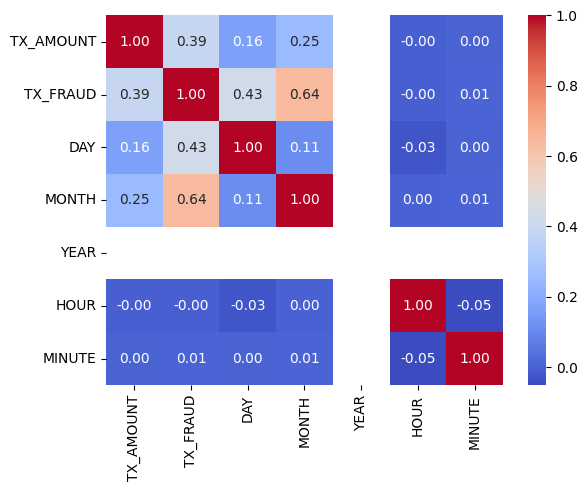

In [126]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [127]:
df.columns

Index(['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_FRAUD', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67000 entries, 0 to 66999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSTOMER_ID  67000 non-null  object 
 1   TERMINAL_ID  67000 non-null  object 
 2   TX_AMOUNT    67000 non-null  float64
 3   TX_FRAUD     67000 non-null  int64  
 4   DAY          67000 non-null  int64  
 5   MONTH        67000 non-null  int64  
 6   YEAR         67000 non-null  int64  
 7   HOUR         67000 non-null  int64  
 8   MINUTE       67000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 4.6+ MB


In [129]:
df[df.duplicated()]

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,DAY,MONTH,YEAR,HOUR,MINUTE


In [130]:
for f in df.columns:
    if df[f].dtype == 'object':
        print(f"{f} : {df[f].nunique()} unique values")
        df[f] = df[f].astype('int64')
    else:
        print(f"{f} : {df[f].dtype}")   

CUSTOMER_ID : 4815 unique values
TERMINAL_ID : 9968 unique values
TX_AMOUNT : float64
TX_FRAUD : int64
DAY : int64
MONTH : int64
YEAR : int64
HOUR : int64
MINUTE : int64


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67000 entries, 0 to 66999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSTOMER_ID  67000 non-null  int64  
 1   TERMINAL_ID  67000 non-null  int64  
 2   TX_AMOUNT    67000 non-null  float64
 3   TX_FRAUD     67000 non-null  int64  
 4   DAY          67000 non-null  int64  
 5   MONTH        67000 non-null  int64  
 6   YEAR         67000 non-null  int64  
 7   HOUR         67000 non-null  int64  
 8   MINUTE       67000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.6 MB


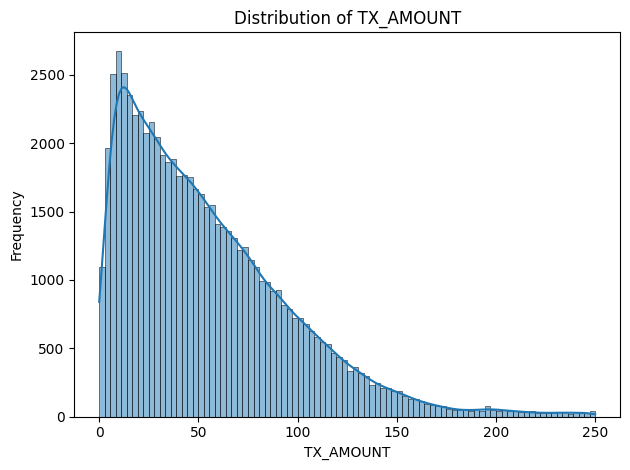

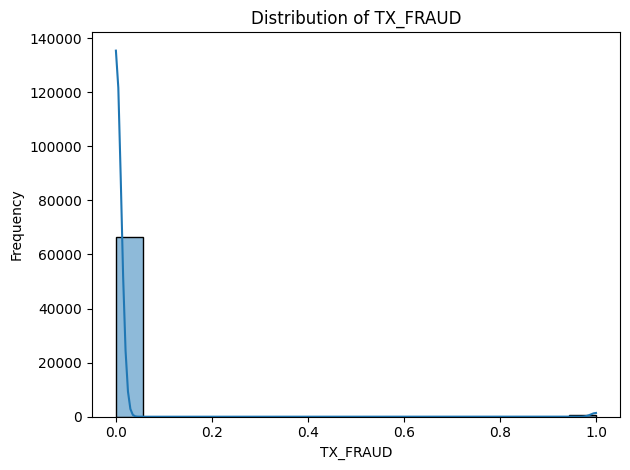

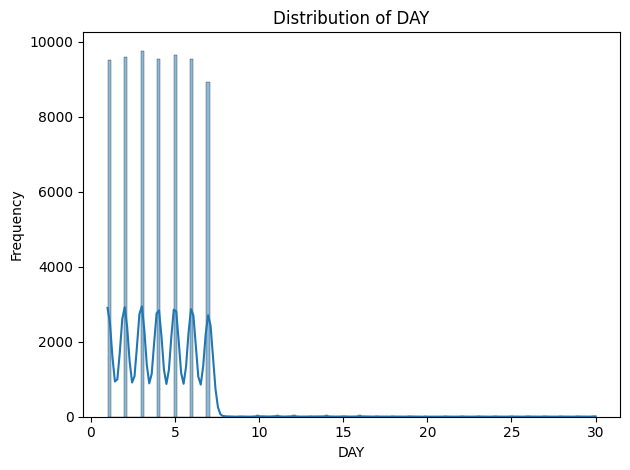

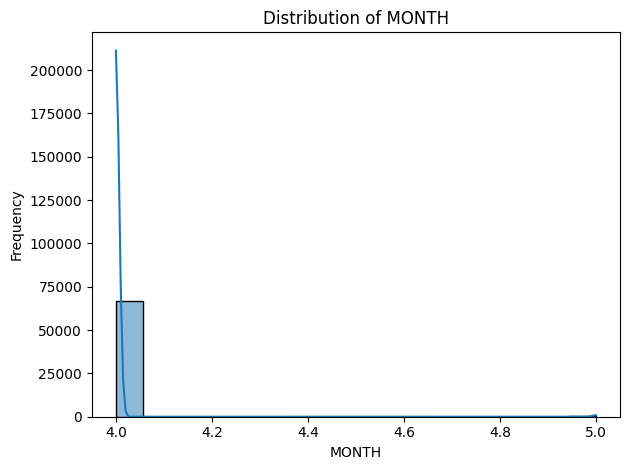

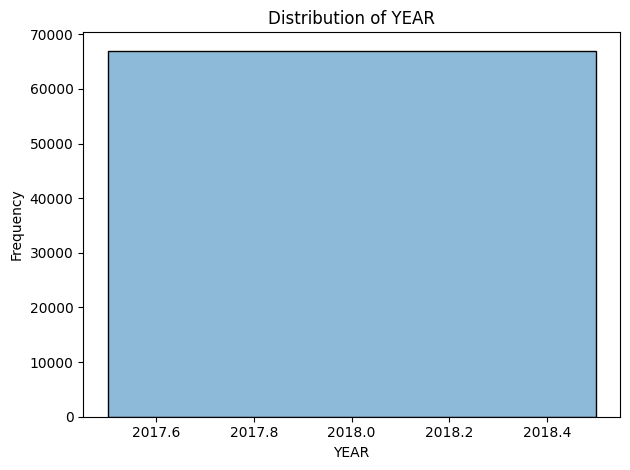

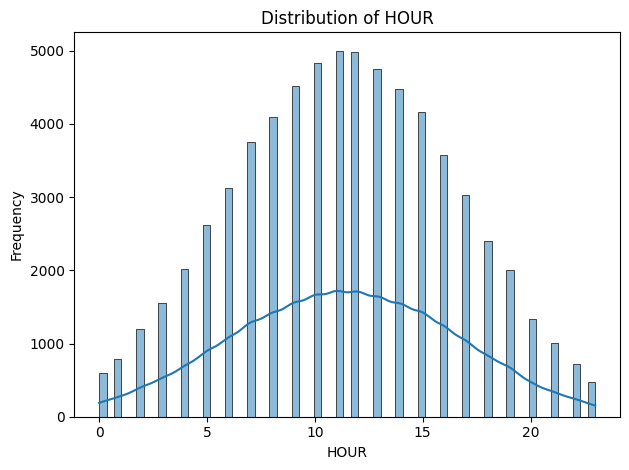

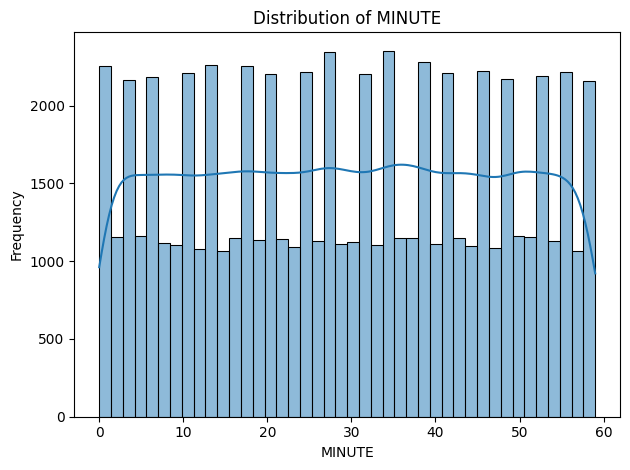

In [132]:
import matplotlib.pyplot as plt

exclude = ['CUSTOMER_ID', 'TERMINAL_ID']
for col in df.columns:
    if col not in exclude:
        plt.figure()
        sn.histplot(data=df, x=col, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

In [133]:
df.columns

Index(['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_FRAUD', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE'],
      dtype='object')

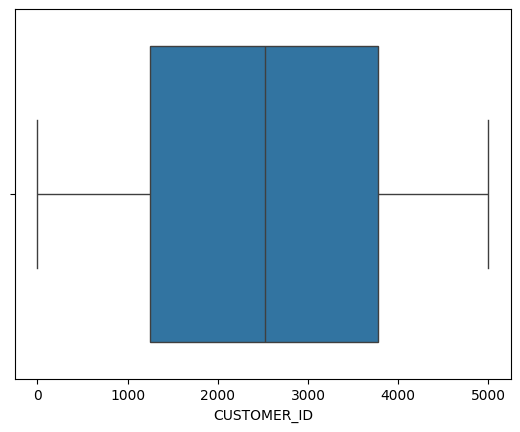

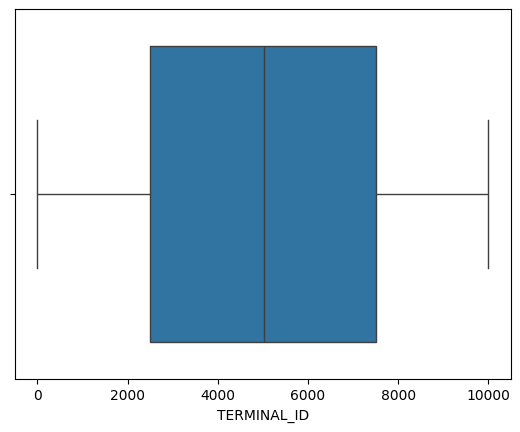

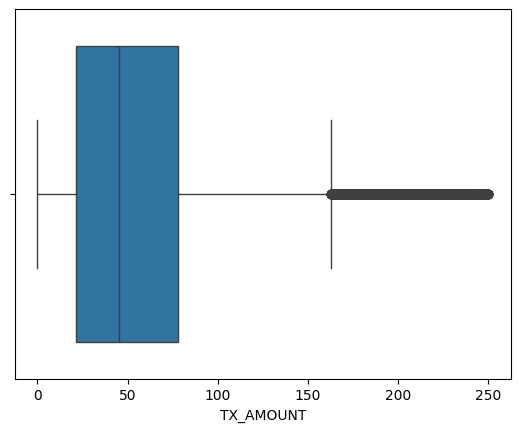

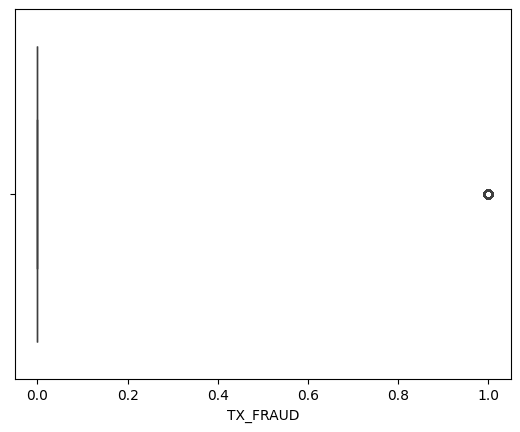

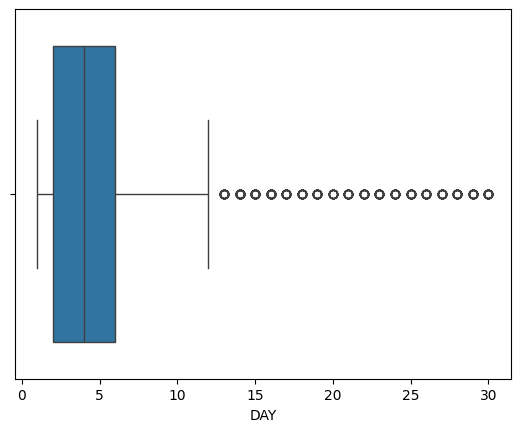

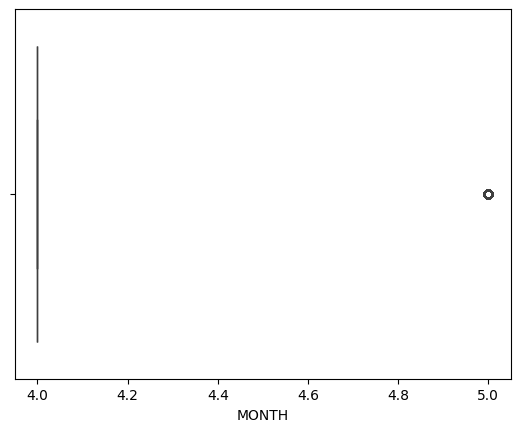

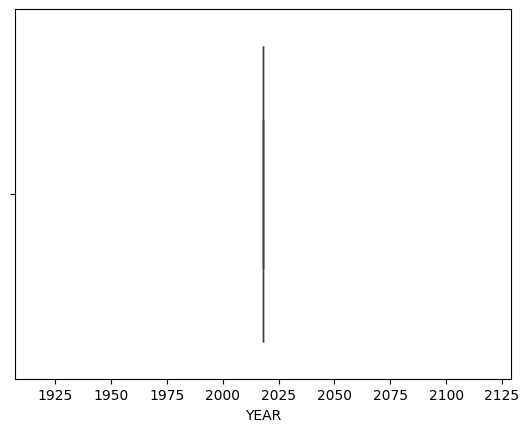

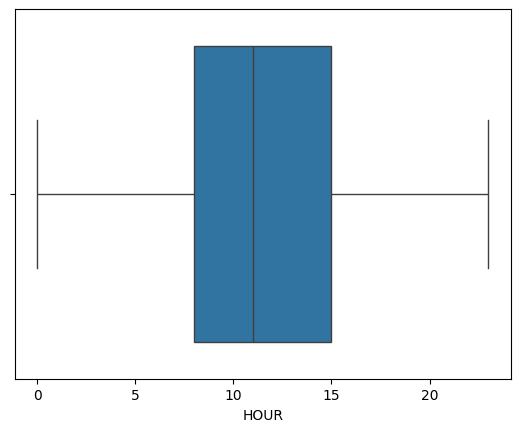

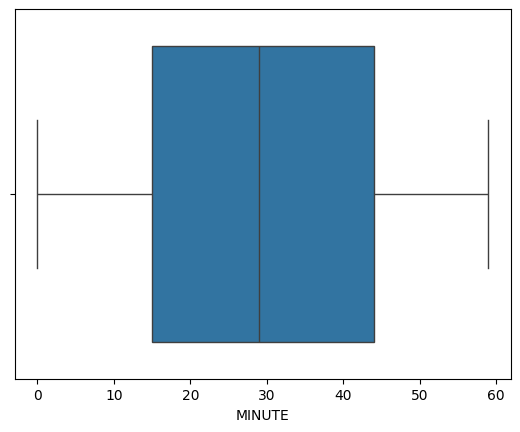

In [134]:
for i in df.columns:
    sn.boxplot(data=df, x=i)
    plt.show()

In [135]:
import numpy as np
def wisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 -1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [136]:
df.describe()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,DAY,MONTH,YEAR,HOUR,MINUTE
count,67000.000000,67000.000000,67000.000000,67000.000000,67000.000000,67000.000000,67000.0,67000.000000,67000.000000
mean,2511.561060,5011.354761,54.640929,0.010149,4.071672,4.004194,2018.0,11.368373,29.456000
std,1448.562297,2894.065954,42.501556,0.100232,2.365528,0.064626,0.0,4.987974,17.258067
min,0.000000,0.000000,0.010000,0.000000,1.000000,4.000000,2018.0,0.000000,0.000000
25%,1252.000000,2500.000000,21.220000,0.000000,2.000000,4.000000,2018.0,8.000000,15.000000
50%,2521.000000,5015.000000,45.220000,0.000000,4.000000,4.000000,2018.0,11.000000,29.000000
75%,3778.000000,7517.000000,77.840000,0.000000,6.000000,4.000000,2018.0,15.000000,44.000000
max,4999.000000,9999.000000,250.000000,1.000000,30.000000,5.000000,2018.0,23.000000,59.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67000 entries, 0 to 66999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSTOMER_ID  67000 non-null  int64  
 1   TERMINAL_ID  67000 non-null  int64  
 2   TX_AMOUNT    67000 non-null  float64
 3   TX_FRAUD     67000 non-null  int64  
 4   DAY          67000 non-null  int64  
 5   MONTH        67000 non-null  int64  
 6   YEAR         67000 non-null  int64  
 7   HOUR         67000 non-null  int64  
 8   MINUTE       67000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.6 MB


In [138]:
df.head()

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,DAY,MONTH,YEAR,HOUR,MINUTE
0,566,5056,20.71,0,4,4,2018,14,34
1,524,1445,13.04,0,2,4,2018,10,46
2,2457,4068,157.29,0,2,4,2018,6,17
3,1636,3895,94.08,0,3,4,2018,0,2
4,4466,6925,24.55,0,4,4,2018,12,59


In [139]:
df.to_csv('processed_fraud_data.csv', index=False)

In [140]:
df.head(29)

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,DAY,MONTH,YEAR,HOUR,MINUTE
0,566,5056,20.71,0,4,4,2018,14,34
1,524,1445,13.04,0,2,4,2018,10,46
2,2457,4068,157.29,0,2,4,2018,6,17
3,1636,3895,94.08,0,3,4,2018,0,2
4,4466,6925,24.55,0,4,4,2018,12,59
5,2641,147,25.32,0,4,4,2018,16,45
6,4790,9937,17.69,0,1,4,2018,11,9
7,1181,8260,27.49,0,5,4,2018,17,36
8,4944,6217,112.48,0,5,4,2018,4,18
9,2340,3709,69.38,0,6,4,2018,7,51
